In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
df = pd.read_csv('multi_sensor_data.csv')


In [17]:
df.head()

,Timestamp,SensorType,SensorID,Event
0,2024-01-22 23:03:08,MotionSensor,1,0.338197
1,2024-01-22 23:03:08,MotionSensor,2,0.694086
2,2024-01-22 23:03:08,MotionSensor,3,0.463437
3,2024-01-22 23:03:08,MotionSensor,4,0.515066
4,2024-01-22 23:03:08,MotionSensor,5,0.117072


In [18]:
df.isnull().sum()

Timestamp     0
SensorType    0
SensorID      0
Event         0
dtype: int64

In [19]:
# perform EDA
df.describe()

,SensorID,Event
count,90.000000,90.000000
mean,12.911111,0.514619
std,9.751571,0.264328
min,1.000000,0.061257
25%,4.000000,0.300000
50%,10.000000,0.500000
75%,21.000000,0.700000
max,32.000000,0.966985


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Timestamp   90 non-null     object 
 1   SensorType  90 non-null     object 
 2   SensorID    90 non-null     int64  
 3   Event       90 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.9+ KB


In [21]:

# Convert 'Timestamp' column to datetime type
df['Timestamp'] = pd.to_datetime(df['Timestamp'])


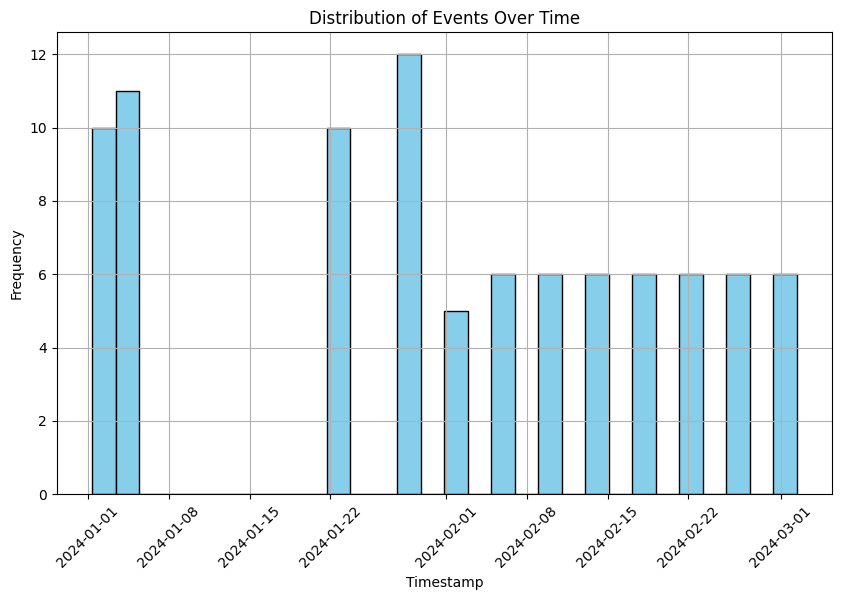

In [22]:

# Distribution of events over time
plt.figure(figsize=(10, 6))
plt.hist(df['Timestamp'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Events Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


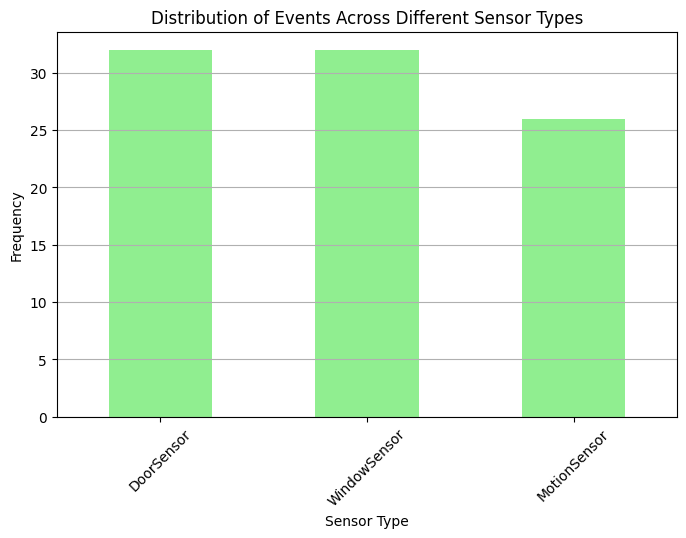

In [23]:

# Distribution of events across different sensor types
plt.figure(figsize=(8, 5))
df['SensorType'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Events Across Different Sensor Types')
plt.xlabel('Sensor Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

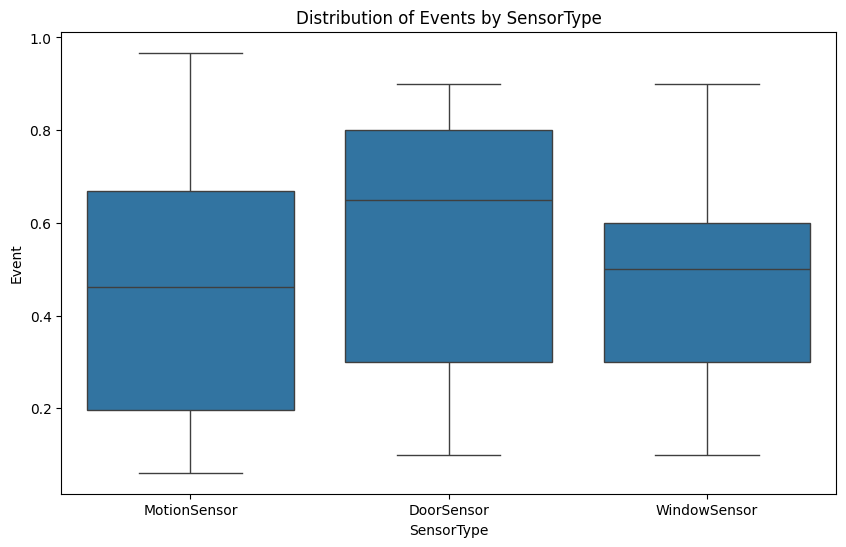

In [25]:
# Visualize the distribution of events for each SensorType
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='SensorType', y='Event')
plt.title('Distribution of Events by SensorType')
plt.xlabel('SensorType')
plt.ylabel('Event')
plt.show()

In [34]:
# perform bivariant analysis
df.columns

Index(['Timestamp', 'SensorType', 'SensorID', 'Event'], dtype='object')

                            Timestamp  SensorType   SensorID      Event
count                              90          90  90.000000  90.000000
unique                            NaN           3        NaN        NaN
top                               NaN  DoorSensor        NaN        NaN
freq                              NaN          32        NaN        NaN
mean    2024-02-01 08:33:00.266666496         NaN  12.911111   0.514619
min               2024-01-01 08:53:46         NaN   1.000000   0.061257
25%               2024-01-22 23:03:08         NaN   4.000000   0.300000
50%               2024-02-02 14:56:27         NaN  10.000000   0.500000
75%               2024-02-18 17:01:01         NaN  21.000000   0.700000
max               2024-03-02 08:49:34         NaN  32.000000   0.966985
std                               NaN         NaN   9.751571   0.264328
Timestamp     0
SensorType    0
SensorID      0
Event         0
dtype: int64


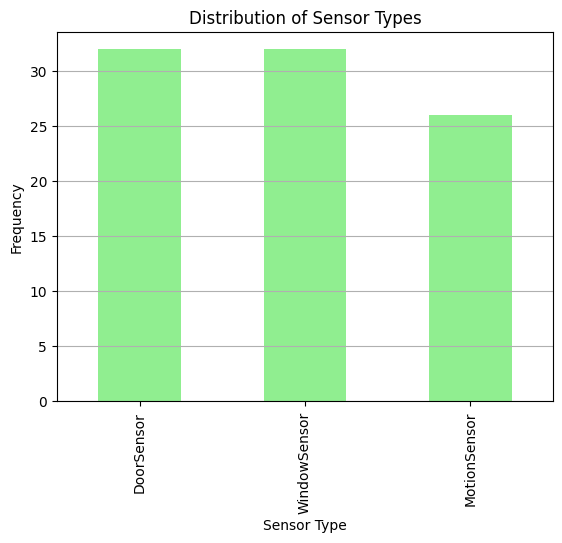

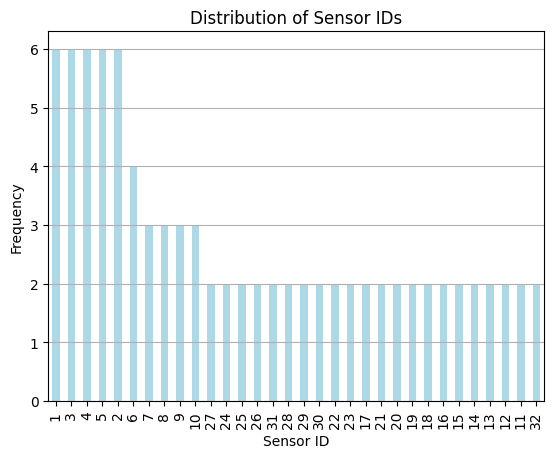

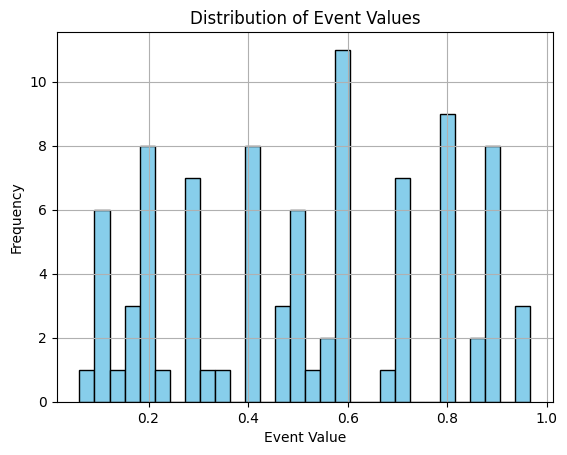

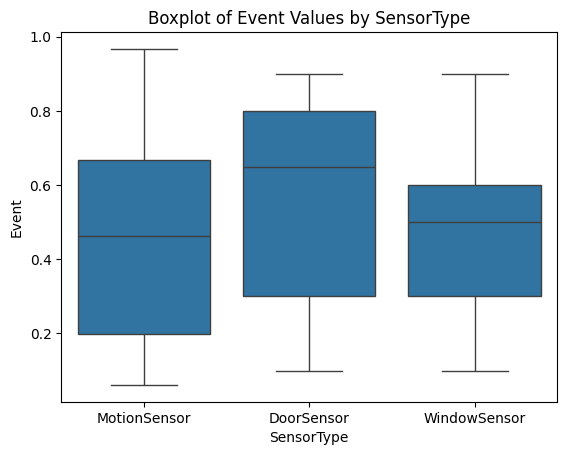

In [35]:
# Descriptive statistics
print(df[['Timestamp', 'SensorType', 'SensorID', 'Event']].describe(include='all'))

# Check for missing values
print(df[['Timestamp', 'SensorType', 'SensorID', 'Event']].isnull().sum())

# Distribution of SensorType
df['SensorType'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Distribution of Sensor Types')
plt.xlabel('Sensor Type')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Distribution of SensorID
df['SensorID'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Distribution of Sensor IDs')
plt.xlabel('Sensor ID')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Distribution of Event values
df['Event'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Event Values')
plt.xlabel('Event Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot of Event values for each SensorType
sns.boxplot(data=df, x='SensorType', y='Event')
plt.title('Boxplot of Event Values by SensorType')
plt.xlabel('SensorType')
plt.ylabel('Event')
plt.show()


In [12]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Define the number of records you want in your dataset
num_records = 2500  # Adjust this number as needed

# Define the date range for generating timestamps
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 3, 10)
delta = end_date - start_date

# Generate timestamps
timestamps = [start_date + timedelta(days=random.randint(0, delta.days), hours=random.randint(0, 23), minutes=random.randint(0, 59), seconds=random.randint(0, 59)) for _ in range(num_records)]

# Define SensorType values
sensor_types = ['MotionSensor', 'DoorSensor', 'WindowSensor']

# Generate SensorType and SensorID values
sensor_ids = list(range(1, 33))  # Assuming there are 32 sensors of each type
sensor_type_sensor_id = [(random.choice(sensor_types), random.choice(sensor_ids)) for _ in range(num_records)]

# Generate Event values
events = [random.random() for _ in range(num_records)]

# Create the DataFrame
df = pd.DataFrame({
    'Timestamp': timestamps,
    'SensorType': [item[0] for item in sensor_type_sensor_id],
    'SensorID': [item[1] for item in sensor_type_sensor_id],
    'Event': events
})

# Sort the DataFrame by Timestamp
df = df.sort_values(by='Timestamp')

# Define the file path where you want to save the CSV file
file_path = 'multi_sensor_data.csv'

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

print(f"CSV file saved to '{file_path}'.")


CSV file saved to 'multi_sensor_data.csv'.


In [9]:
import pandas as pd
import random
from datetime import datetime, timedelta

# Define the number of records you want in your dataset
num_records = 2500  # Adjust this number as needed

# Define the date range for generating timestamps
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 3, 10)
delta = end_date - start_date

# Generate timestamps
timestamps = [start_date + timedelta(days=random.randint(0, delta.days), hours=random.randint(0, 23), minutes=random.randint(0, 59), seconds=random.randint(0, 59)) for _ in range(num_records)]

# Define SensorType values
sensor_types = ['MotionSensor', 'DoorSensor', 'WindowSensor']

# Generate SensorType and SensorID values
sensor_ids = list(range(1, 33))  # Assuming there are 32 sensors of each type
sensor_type_sensor_id = [(random.choice(sensor_types), random.choice(sensor_ids)) for _ in range(num_records)]

# Generate Event values
events = [random.random() for _ in range(num_records)]

# Create the DataFrame
df = pd.DataFrame({
    'Timestamp': timestamps,
    'SensorType': [item[0] for item in sensor_type_sensor_id],
    'SensorID': [item[1] for item in sensor_type_sensor_id],
    'Event': events
})

# Sort the DataFrame by Timestamp
df = df.sort_values(by='Timestamp')

# Print the DataFrame
print(df)


               Timestamp    SensorType  SensorID     Event
1600 2024-01-01 00:02:44  MotionSensor        30  0.278401
1270 2024-01-01 00:24:49    DoorSensor        21  0.398121
1567 2024-01-01 00:29:54    DoorSensor        21  0.351642
2000 2024-01-01 00:43:40    DoorSensor         8  0.049965
1714 2024-01-01 02:28:18  MotionSensor         7  0.764495
...                  ...           ...       ...       ...
881  2024-03-10 22:17:05  WindowSensor         9  0.201065
2078 2024-03-10 22:27:03  WindowSensor        11  0.498932
1672 2024-03-10 22:29:02    DoorSensor        15  0.469385
373  2024-03-10 23:18:08    DoorSensor        13  0.989592
2253 2024-03-10 23:58:37  WindowSensor        29  0.600609

[2500 rows x 4 columns]


Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 1600 to 2253
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Timestamp   2500 non-null   datetime64[ns]
 1   SensorType  2500 non-null   object        
 2   SensorID    2500 non-null   int64         
 3   Event       2500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 97.7+ KB
None

Summary Statistics:
                           Timestamp     SensorID        Event
count                           2500  2500.000000  2500.000000
mean      2024-02-04 18:44:08.395200    16.504000     0.506445
min              2024-01-01 00:02:44     1.000000     0.000139
25%    2024-01-17 19:03:20.750000128     8.000000     0.256061
50%              2024-02-04 02:36:23    17.000000     0.512010
75%              2024-02-22 23:55:28    24.000000     0.750464
max              2024-

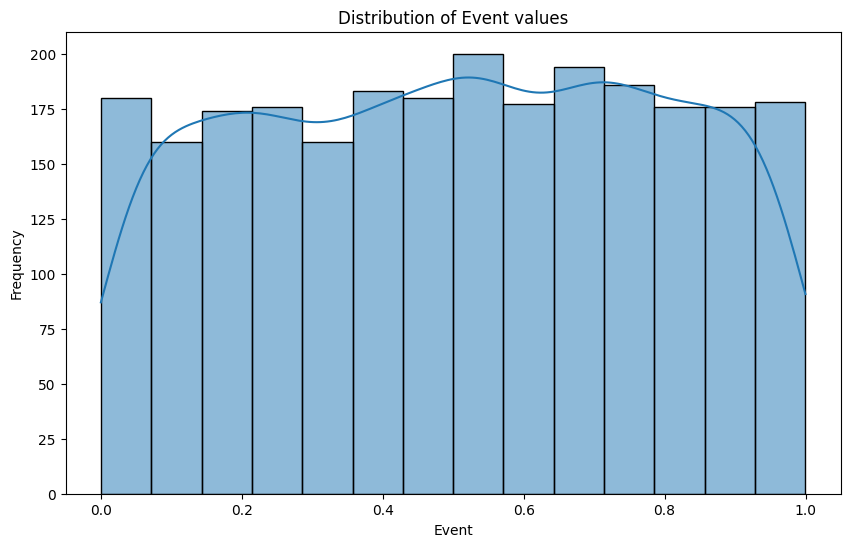

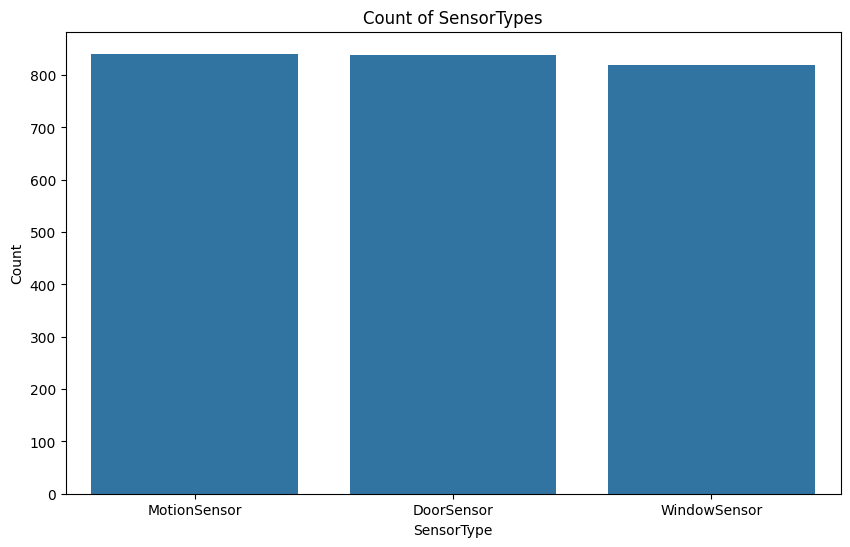

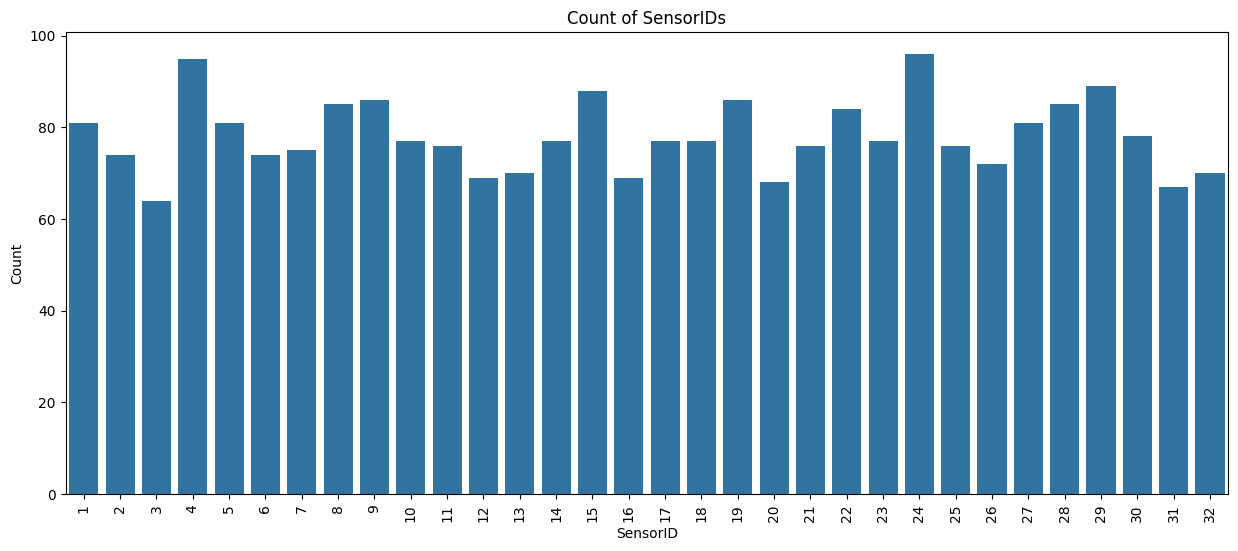

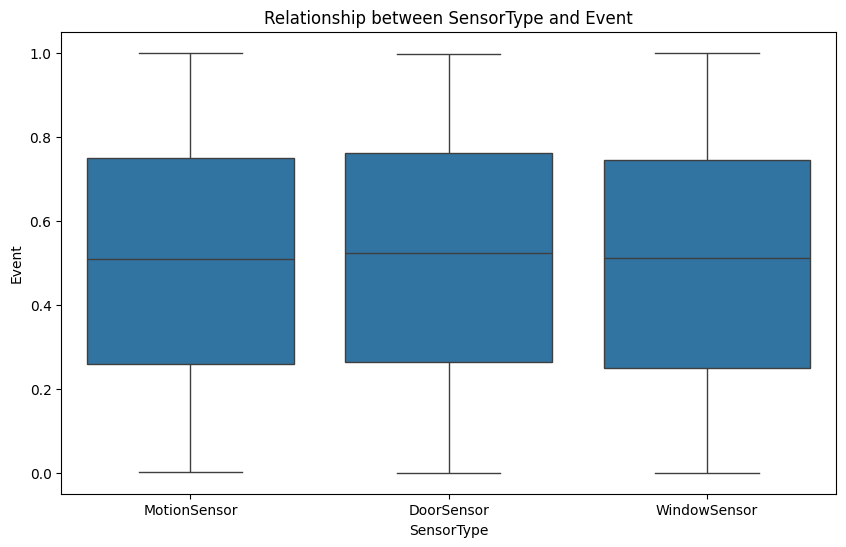

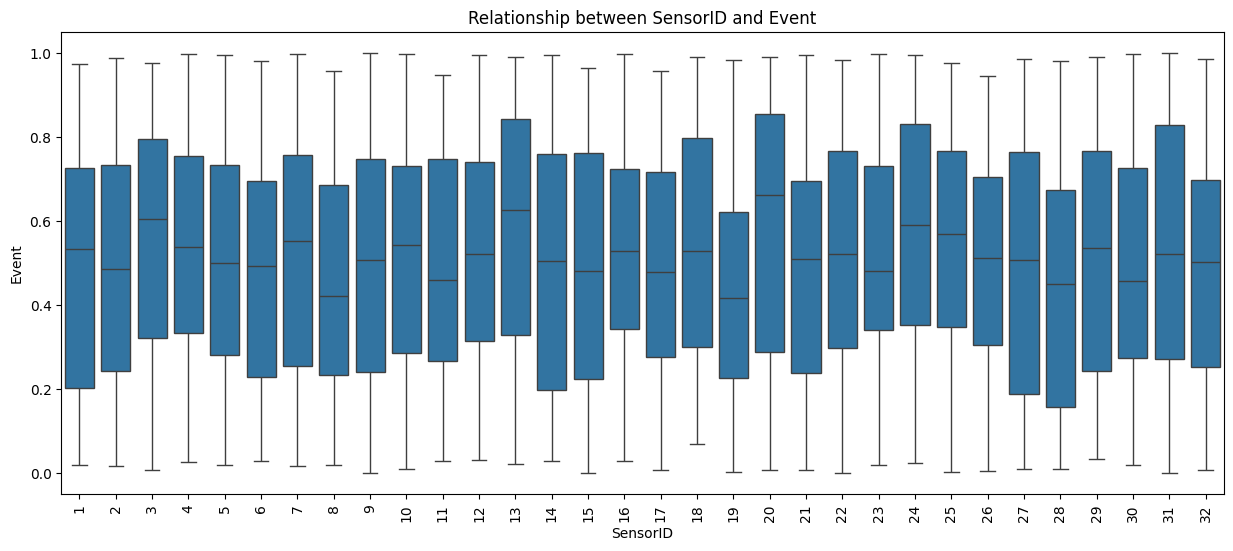

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Assuming 'df' is the DataFrame generated previously
# If not, replace 'df' with the name of your DataFrame
# Example: df = pd.read_csv('your_dataset.csv')
# Make sure the dataset is loaded properly before proceeding with EDA

# Display basic information about the dataset
print("Basic Information about the Dataset:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Distribution of Event values
plt.figure(figsize=(10, 6))
sns.histplot(df['Event'], kde=True)
plt.title('Distribution of Event values')
plt.xlabel('Event')
plt.ylabel('Frequency')
plt.show()

# Countplot for SensorType
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SensorType')
plt.title('Count of SensorTypes')
plt.xlabel('SensorType')
plt.ylabel('Count')
plt.show()

# Countplot for SensorID
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='SensorID')
plt.title('Count of SensorIDs')
plt.xlabel('SensorID')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Relationship between SensorType and Event
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='SensorType', y='Event')
plt.title('Relationship between SensorType and Event')
plt.xlabel('SensorType')
plt.ylabel('Event')
plt.show()

# Relationship between SensorID and Event
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='SensorID', y='Event')
plt.title('Relationship between SensorID and Event')
plt.xlabel('SensorID')
plt.ylabel('Event')
plt.xticks(rotation=90)
plt.show()


C:\Users\Shree\AppData\Local\Temp\ipykernel_22464\1992799042.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_data = df['Event'].resample('H').mean()


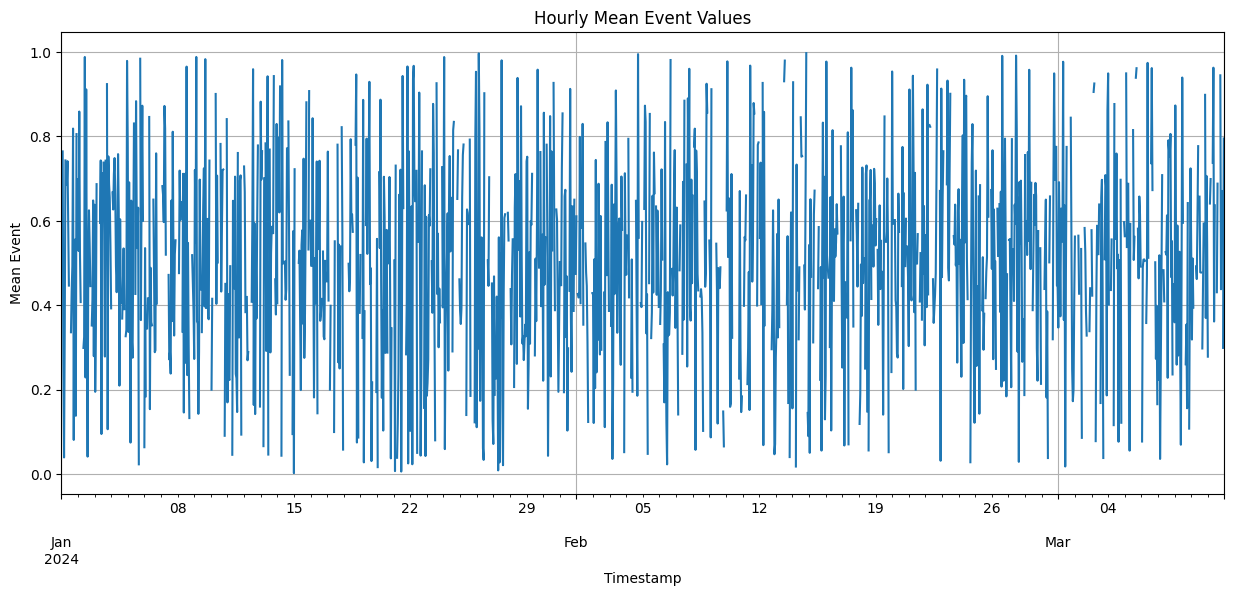

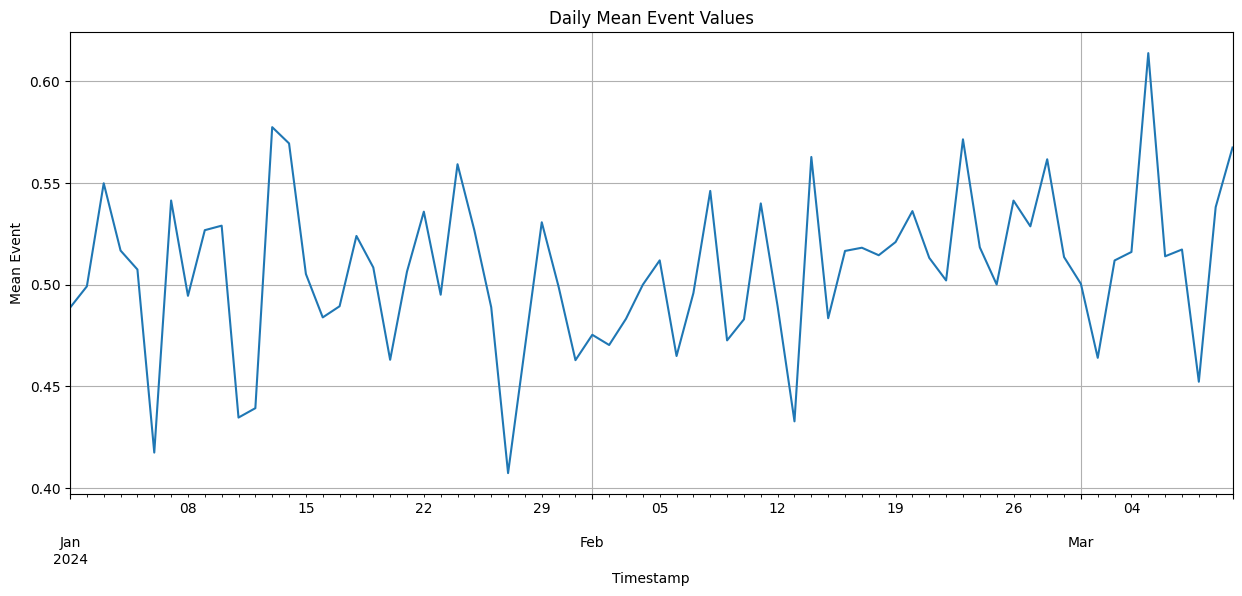

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
# Assuming 'df' is the DataFrame generated previously
# If not, replace 'df' with the name of your DataFrame
# Example: df = pd.read_csv('your_dataset.csv')
# Make sure the dataset is loaded properly before proceeding with time series analysis

# Convert 'Timestamp' column to datetime type
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set 'Timestamp' column as the index
df.set_index('Timestamp', inplace=True)

# Resample data to hourly frequency and aggregate the mean of 'Event'
hourly_data = df['Event'].resample('H').mean()

# Plot hourly mean Event values
plt.figure(figsize=(15, 6))
hourly_data.plot()
plt.title('Hourly Mean Event Values')
plt.xlabel('Timestamp')
plt.ylabel('Mean Event')
plt.grid(True)
plt.show()

# Resample data to daily frequency and aggregate the mean of 'Event'
daily_data = df['Event'].resample('D').mean()

# Plot daily mean Event values
plt.figure(figsize=(15, 6))
daily_data.plot()
plt.title('Daily Mean Event Values')
plt.xlabel('Timestamp')
plt.ylabel('Mean Event')
plt.grid(True)
plt.show()
